In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.plotly as py
import plotly
import plotly.graph_objs as go
from matplotlib import style
from scipy import stats
style.use('seaborn-deep')
from modules.datalab_beta import *
import warnings
warnings.filterwarnings('ignore')

# Load the training data

In [2]:
train__normal=pd.read_csv('../data_set/train.csv')
train__normal=train__normal.drop('Unnamed: 0', 1)
train__normal=train__normal.drop('team_1', 1)
train__normal=train__normal.drop('team_2', 1)

# Load the test data

In [3]:
test__normal=pd.read_csv('../data_set/test.csv')
test__normal=test__normal.drop('Unnamed: 0', 1)
test__normal=test__normal.drop('team_1', 1)
test__normal=test__normal.drop('team_2', 1)

In [4]:
test__normal.describe()

,stage,fifa_rank1,avg_age1,elo1,star_count1,coach_performance1,home_country_adv1,home_continent_adv1,last_best_performance1,final1,...,avg_players_goal,country_happiness_rank,gdp,population,happiness_score,life_expectancy,freedom,generosity,goverment_corruption,winner
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.00000,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,32.000000
mean,1.937500,17.281250,27.193750,1906.968750,2.968750,17.593750,0.062500,0.593750,14.312500,1.187500,...,0.000000,0.000000,0.000000,0.00000,0.000000,1.084202e-19,-8.673617e-19,-2.168404e-19,-1.897354e-19,0.000000
std,1.216486,17.883556,0.819102,100.249522,1.750288,9.634814,0.245935,0.498991,11.289268,1.874059,...,2.355527,33.789672,29.183513,68.68582,0.890859,1.456550e-01,1.416559e-01,1.581546e-01,1.461840e-01,0.879883
min,1.000000,2.000000,25.900000,1697.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,-4.217391,-75.000000,-63.000000,-119.00000,-2.229000,-3.416113e-01,-3.702344e-01,-3.437597e-01,-3.576670e-01,-1.000000
25%,1.000000,5.750000,26.400000,1856.000000,1.750000,10.750000,0.000000,0.000000,7.000000,0.000000,...,-2.065217,-14.250000,-13.500000,-55.25000,-0.442250,-9.754986e-02,-7.239319e-02,-1.073019e-01,-9.387743e-02,-1.000000
50%,1.500000,14.000000,27.400000,1927.000000,3.000000,21.000000,0.000000,1.000000,9.000000,0.500000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,2.250000,21.000000,27.725000,1985.250000,5.000000,24.000000,0.000000,1.000000,16.500000,2.000000,...,2.065217,14.250000,13.500000,55.25000,0.442250,9.754986e-02,7.239319e-02,1.073019e-01,9.387743e-02,1.000000
max,5.000000,70.000000,28.700000,2114.000000,6.000000,32.000000,1.000000,1.000000,40.000000,7.000000,...,4.217391,75.000000,63.000000,119.00000,2.229000,3.416113e-01,3.702344e-01,3.437597e-01,3.576670e-01,1.000000


# Divide the features and target column

In [5]:
def training(data, target_col='winner'):
    features = data.drop(target_col, 1)
    target = data[target_col]
    x = to_array(features)
    y = to_array(target)
    return x, y

# Load all models

In [6]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
r_scaler = preprocessing.RobustScaler()
s_scaler = preprocessing.StandardScaler()
train__normal.winner = train__normal.winner.apply(to_float)
train__normal.replace(np.inf, np.nan)
train__normal = train__normal.dropna()
train__normal = train__normal.sample(frac=1)
train=train__normal
test__normal.winner = test__normal.winner.apply(to_float)
test__normal.replace(np.inf, np.nan)
test__normal = test__normal.dropna()
test__normal = test__normal.sample(frac=1)
test=test__normal
train.reset_index(drop=True, inplace=True)
xx_train, yy_train = training(train, target_col='winner')
xx_test, yy_test = training(test, target_col='winner')

In [7]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline

# Logistic All scaling

In [8]:
#from datalab_beta import calculate_precision

### Normal Distribution
lr_nor = LogisticRegression()
lr_nor.fit(xx_train, yy_train)
predicted_value_lr_nor = lr_nor.predict(xx_test)
lr_accuracy_score_lr_nor=calculate_accuracy_score(yy_test, predicted_value_lr_nor)
#lr_confusion=calculate_confusion_matrix(yy_test,predicted_value_lr)

### MinMax Distribution
lr_min= LogisticRegression()
xx_train_min = mm_scaler.fit_transform(xx_train) ## SCale
lr_min.fit(xx_train_min, yy_train)
xx_test_min = mm_scaler.fit_transform(xx_test)  #scale
predicted_value_lr_min = lr_min.predict(xx_test_min)
lr_accuracy_score_lr_min=calculate_accuracy_score(yy_test, predicted_value_lr_min)


### Standard Distribution
lr_std= LogisticRegression()
xx_train_std = s_scaler.fit_transform(xx_train)
lr_std.fit(xx_train_std, yy_train)
xx_test_std = s_scaler.fit_transform(xx_test)
predicted_value_lr_std = lr_std.predict(xx_test_std)
lr_accuracy_score_lr_std=calculate_accuracy_score(yy_test, predicted_value_lr_std)
### Robust Distribution
lr_robust= LogisticRegression()
xx_train_r= r_scaler.fit_transform(xx_train)
lr_robust.fit(xx_train_r, yy_train)
xx_test_r = r_scaler.fit_transform(xx_test)
predicted_value_lr_robust = lr_robust.predict(xx_test_r)
lr_accuracy_score_lr_robust=calculate_accuracy_score(yy_test, predicted_value_lr_std)

# Robust all scaling

In [9]:
#rf = RandomForestClassifier()

#from datalab_beta import calculate_precision

### Normal Distribution
rf_nor = RandomForestClassifier()
rf_nor.fit(xx_train, yy_train)
predicted_value_rf_nor = rf_nor.predict(xx_test)
rf_accuracy_score_rf_nor=calculate_accuracy_score(yy_test, predicted_value_rf_nor)
#lr_confusion=calculate_confusion_matrix(yy_test,predicted_value_lr)

### MinMax Distribution
rf_min= RandomForestClassifier()
#xx_train_min = mm_scaler.fit_transform(xx_train) ## SCale
rf_min.fit(xx_train_min, yy_train)
#xx_test_min = mm_scaler.fit_transform(xx_test)  #scale
predicted_value_rf_min = rf_min.predict(xx_test_min)
rf_accuracy_score_rf_min=calculate_accuracy_score(yy_test, predicted_value_rf_min)


### Standard Distribution
rf_std= RandomForestClassifier()
#xx_train_std = s_scaler.fit_transform(xx_train)
rf_std.fit(xx_train_std, yy_train)
#xx_test_std = s_scaler.fit_transform(xx_test)
predicted_value_rf_std = rf_std.predict(xx_test_std)
rf_accuracy_score_rf_std=calculate_accuracy_score(yy_test, predicted_value_rf_std)
### Robust Distribution
rf_robust= RandomForestClassifier()
#xx_train_r= r_scaler.fit_transform(xx_train)
rf_robust.fit(xx_train_r, yy_train)
#xx_test_r = r_scaler.fit_transform(xx_test)
predicted_value_rf_robust = rf_robust.predict(xx_test_r)
rf_accuracy_score_rf_robust=calculate_accuracy_score(yy_test, predicted_value_rf_std)

# SVC All scaling

In [10]:

### Normal Distribution

svc_nor = SVC(kernel='linear')
svc_nor.fit(xx_train, yy_train)
predicted_value_svc_nor = svc_nor.predict(xx_test)
svc_accuracy_score_svc_nor=calculate_accuracy_score(yy_test, predicted_value_svc_nor)
#lr_confusion=calculate_confusion_matrix(yy_test,predicted_value_lr)

### MinMax Distribution

svc_min= SVC(kernel='linear')
#xx_train_min = mm_scaler.fit_transform(xx_train) ## SCale
svc_min.fit(xx_train_min, yy_train)
#xx_test_min = mm_scaler.fit_transform(xx_test)  #scale
predicted_value_svc_min = svc_min.predict(xx_test_min)
svc_accuracy_score_svc_min=calculate_accuracy_score(yy_test, predicted_value_svc_min)


### Standard Distribution

svc_std= SVC(kernel='linear')
#xx_train_std = s_scaler.fit_transform(xx_train)
svc_std.fit(xx_train_std, yy_train)
#xx_test_std = s_scaler.fit_transform(xx_test)
predicted_value_svc_std = svc_std.predict(xx_test_std)
svc_accuracy_score_svc_std=calculate_accuracy_score(yy_test, predicted_value_svc_std)
### Robust Distribution

svc_robust= SVC(kernel='linear')
#xx_train_r= r_scaler.fit_transform(xx_train)
svc_robust.fit(xx_train_r, yy_train)
#xx_test_r = r_scaler.fit_transform(xx_test)
predicted_value_svc_robust = svc_robust.predict(xx_test_r)
svc_accuracy_score_svc_robust=calculate_accuracy_score(yy_test, predicted_value_svc_std)

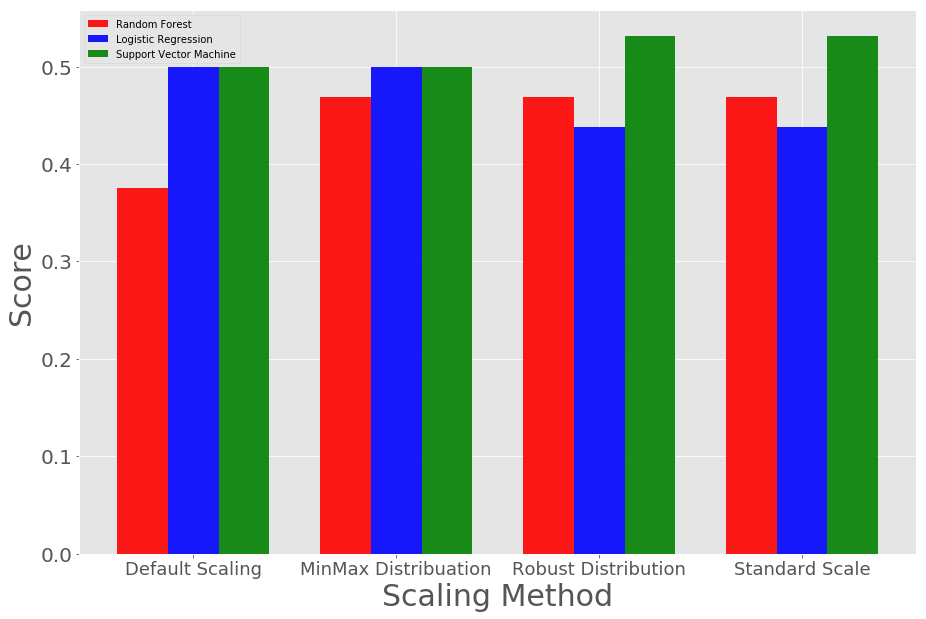

In [75]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,10)
plt.style.use('ggplot')
n = 4
#print("Manaully","Svc: ", accu_svc, "Lr: ", accu_lr, "RF ", accu_rf)
#print("From Scikit","Svc: ", al_svcr,"Lr: ", al_lr,"RF: ", al_rf)
#without_CV=(svc_accuracy_score,lr_accuracy_score,rf_accuracy_score)
lr=(lr_accuracy_score_lr_nor,lr_accuracy_score_lr_min,lr_accuracy_score_lr_robust,lr_accuracy_score_lr_std)
rf=(rf_accuracy_score_rf_nor,rf_accuracy_score_rf_min,rf_accuracy_score_rf_robust,rf_accuracy_score_rf_std)
svc=(svc_accuracy_score_svc_nor,svc_accuracy_score_svc_min,svc_accuracy_score_svc_robust,svc_accuracy_score_svc_std)
#Loo_CV_manual=(accu_svc,accu_lr,accu_rf)
#milan= (73, 43, 44, 70, 61)
#inter = (54, 59, 69, 46, 58)
fig, ax = plt.subplots()
index = np.arange(4)
bar_width = 0.25
opacity = 0.9
ax.bar(index, rf, bar_width, alpha=opacity, color='r',
                label='Random Forest')
#ax.bar(index, rf, bar_width, alpha=opacity, color='r',
                #label='Random Forest')
ax.bar(index+bar_width, lr, bar_width, alpha=opacity, color='b',label='Logistic Regression')

ax.bar(index+bar_width+bar_width, svc, bar_width, alpha=opacity, color='g', label='Support Vector Machine')
ax.set_xlabel('Scaling Method',fontsize=30)
ax.set_ylabel('Score',fontsize=30)



#ax.set_yticklabels(lr)

ax.tick_params(axis = 'y', which = 'major', labelsize = 20)
#ax.set_title('Model:Random',fontsize=40)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(('Default Scaling','MinMax Distribuation','Robust Distribution','Standard Scale'),size=18)
ax.legend()
plt.savefig('../images/all_final__scale.png')
plt.show()

ModuleNotFoundError: No module named 'plotly.graph_objects'

# Hyperparameter optimization

In [76]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline

# Random Forest (Hyper)

In [77]:
RF = RandomForestClassifier()
n_estimators=[10, 100, 1000]
max_depth=[5,8,15,25,30,None]
min_samples_leaf=[1,2,5,10,15,100]
max_leaf_nodes=[2, 5,10]
hyperparameters = dict(n_estimators=n_estimators, max_depth=max_depth,min_samples_leaf=min_samples_leaf, max_leaf_nodes=max_leaf_nodes) 
gridsearch_rf = GridSearchCV(RF, hyperparameters, cv=2, verbose=1) 
best_model_rf = gridsearch_rf.fit(xx_train_min, yy_train)
print('Best n_estimators:', best_model_rf.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model_rf.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', best_model_rf.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_leaf_nodes:', best_model_rf.best_estimator_.get_params()['max_leaf_nodes'])
print("The mean accuracy of the model is:",best_model_rf.score(xx_train_min, yy_train))

Fitting 2 folds for each of 324 candidates, totalling 648 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best n_estimators: 10
Best max_depth: 15
Best min_samples_leaf: 5
Best max_leaf_nodes: 2
The mean accuracy of the model is: 0.6145833333333334


[Parallel(n_jobs=1)]: Done 648 out of 648 | elapsed:  2.1min finished


# Support Vector machine (Hyper)

In [78]:
svc = SVC()
degree=[0, 1, 2, 3, 4, 5, 6]
kernel=['linear', 'rbf', 'poly']
gamma=[0.1, 1, 10, 100]
C=np.logspace(0.1, 1, 10, 100, 1000)
hyperparameters = dict(C=C, degree=degree, kernel=kernel, gamma=gamma)
gridsearch = GridSearchCV(svc, hyperparameters, cv=2, verbose=1)
best_model = gridsearch.fit(xx_train_std, yy_train)
print('Best Degree:', best_model.best_estimator_.get_params()['degree'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best Kernel:', best_model.best_estimator_.get_params()['kernel'])
print('Best Gamma:', best_model.best_estimator_.get_params()['gamma'])
print("The mean accuracy of the model is:",best_model.score(xx_train_std, yy_train))

Fitting 2 folds for each of 840 candidates, totalling 1680 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Degree: 0
Best C: 1.9952623149688797
Best Kernel: rbf
Best Gamma: 0.1
The mean accuracy of the model is: 1.0


[Parallel(n_jobs=1)]: Done 1680 out of 1680 | elapsed:    5.4s finished


# Logistic Regression (Hyper)

In [79]:
import warnings
warnings.filterwarnings('ignore')
logistic = LogisticRegression()
penalty = ['l2']
C = np.logspace(0, 4, 10)
solver=['newton-cg','saga','sag','liblinear']
hyperparameters = dict(C=C, penalty=penalty,solver=solver) 
gridsearch = GridSearchCV(logistic, hyperparameters, cv=2, verbose=1) 
best_model = gridsearch.fit(xx_train_min, yy_train)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best solver:', best_model.best_estimator_.get_params()['solver'])
print("The mean accuracy of the model is:",best_model.score(xx_train_min, yy_train))

Fitting 2 folds for each of 40 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Penalty: l2
Best C: 1.0
Best solver: saga
The mean accuracy of the model is: 0.7708333333333334


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.0s finished


# SVC WITH BEST HYPER METER STANDARD SCALE

In [82]:
svc_std_h= SVC(degree=1,C=3.9810717055349727,kernel='poly',gamma=0.1)
svc_std_h.fit(xx_train_std, yy_train)
predicted_value_svc_std_h = svc_std_h.predict(xx_test_std)
svc_accuracy_score_svc_std_h=calculate_accuracy_score(yy_test, predicted_value_svc_std_h)

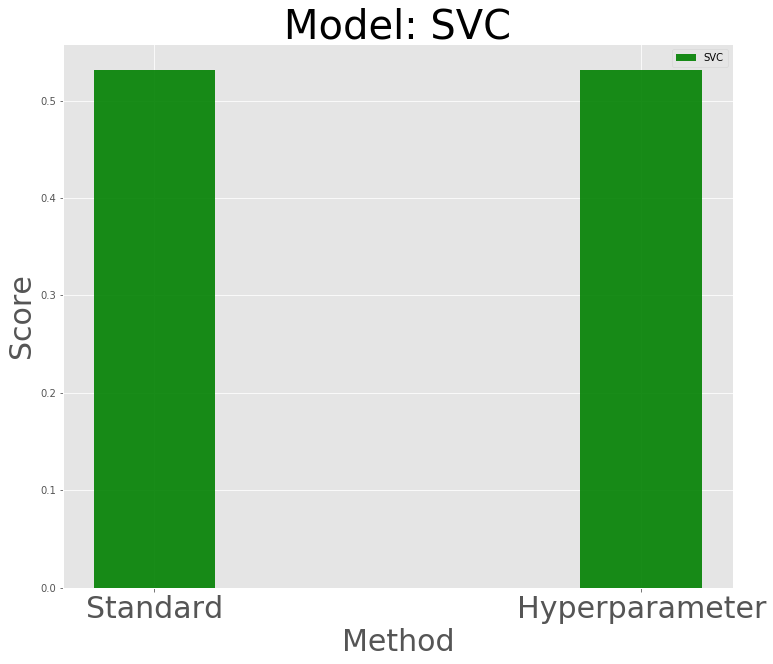

In [83]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,10)
plt.style.use('ggplot')
n = 2
svc=(svc_accuracy_score_svc_std,svc_accuracy_score_svc_std_h)
fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.25
opacity = 0.9
ax.bar(index, svc, bar_width, alpha=opacity, color='g',label='SVC')
ax.set_xlabel('Method',fontsize=30)
ax.set_ylabel('Score',fontsize=30)
ax.set_title('Model: SVC',fontsize=40)
ax.set_xticks(index)
ax.set_xticklabels(('Standard','Hyperparameter'),size=30)
ax.legend()
plt.savefig('../images/svc/SVC_std_with_best_h.png')
plt.show()

In [95]:
from sklearn.model_selection import KFold
from sklearn import preprocessing
#s_scaler = preprocessing.MinMaxScaler()
#s_scaler = preprocessing.RobustScaler()
s_scaler = preprocessing.StandardScaler()
svc_loo = SVC(degree=1,C=3.9810717055349727,kernel='poly',gamma=0.1, probability=True)
data_loo_m_new=pd.read_csv('../data_set/loo_train_test.csv')
data_loo_m_new=data_loo_m_new.drop('Unnamed: 0', 1)
data = data_loo_m_new
Team=data.iloc[:,0:2] # Team for check whether the test team is in the training team
X = data.iloc[:,0:86] # X for all feature selection including team name
y = data.iloc[:,-1] # Y for select the target column like winner
confusion_matrix_loo_svc=np.zeros((3, 3))

sum_accu=0
for j in range(10):
    for i in range(64):
        # It will test every row from the data set. Fistly, 0th row as test, other 94 as training
        team=Team.iloc[i] # select the teams which should be tested
        if ((team['team_1']==X['team_2']) & (team['team_2']==X['team_1'])).any(): # it will find out the index number of swaping team 
            k=X[((team['team_1']==X['team_2']) & (team['team_2']==X['team_1']))].index
    
        X_train=X.iloc[0:len(X)] # Every time it will Select the training set including testing and swaping team
        X_train=X_train.iloc[:, 2:86] # Now it will exclude the swaping team from the data set
    
        X_test1=X_train.iloc[i] # With index i , selecting the testing row
        X_test2=X_train.iloc[k]
        y_test1=y.iloc[i]# testing target value
        y_test2=y.iloc[k]
        
        X_train=X_train.drop(k) # drop the same tested team from training data set
        X_train=X_train.drop(i) #drop the testing row from the train set
   
        y_train=y.iloc[0:len(X)] # Select all target value including the testing and swaping team
        y_train=y_train.drop(k)  # drop the same tested team from training data set
        y_train=y_train.drop(i)  #drop the testing row from the train set
    
        X_train=X_train.values
        y_train=y_train.apply(to_float)
        y_train=y_train.values
   
        X_test1=X_test1.values
        X_test1=X_test1.reshape(1, -1)
        
        X_test2=X_test2.values
        if len(k)==1:
            X_test2=X_test2.reshape(1, -1)
            
            
            
       
        X_train = s_scaler.fit_transform(X_train)
        X_test1 = s_scaler.fit_transform(X_test1)
        X_test2 = s_scaler.fit_transform(X_test2)
        

        svc_loo.fit(X_train,y_train)
        predict1=svc_loo.predict(X_test1)
        confusion_matrix_loo_svc[int(y_test1)][int(predict1)]=confusion_matrix_loo_svc[int(y_test1)][int(predict1)]+1
        if len(k)==1:
            predict2=svc_loo.predict(X_test2)
            confusion_matrix_loo_svc[int(y_test2)][int(predict2)]=confusion_matrix_loo_svc[int(y_test2)][int(predict2)]+1
        else:
            for m in range(len(k)):
                X_test_m=X_test2[m]
                X_test_m=X_test_m.reshape(1, -1)
                predict2=svc_loo.predict(X_test_m)
                confusion_matrix_loo_svc[int(y_test2.iloc[m])][int(predict2)]=confusion_matrix_loo_svc[int(y_test2.iloc[m])][int(predict2)]+1
                
                

In [98]:
svc_loo

SVC(C=3.9810717055349727, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=0.1, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [99]:
confusion_matrix_loo_svc

array([[  0.,   0., 260.],
       [  0., 140., 380.],
       [  0., 150., 370.]])

In [100]:
b_svc_tp_sum=confusion_matrix_loo_svc.diagonal().sum()
b_total_svc=confusion_matrix_loo_svc.sum()
b_accu_svc=b_svc_tp_sum/float(b_total_svc)

In [101]:
b_accu_svc

0.3923076923076923

In [102]:
b_total_svc

1300.0

In [103]:
svc_precision=calculate_precision_matrix(confusion_matrix_loo_svc)
svc_recall=calculate_recall_matrix(confusion_matrix_loo_svc)
svc_f_score=calculate_f_score_matrix(confusion_matrix_loo_svc)
svc_accuracy_class=calculate_accuracy_matrix_class(confusion_matrix_loo_svc)

In [104]:
lr_precision=calculate_precision_matrix(confusion_matrix_loo_lr)
lr_recall=calculate_recall_matrix(confusion_matrix_loo_lr)
lr_f_score=calculate_f_score_matrix(confusion_matrix_loo_lr)
lr_accuracy_class=calculate_accuracy_matrix_class(confusion_matrix_loo_lr)

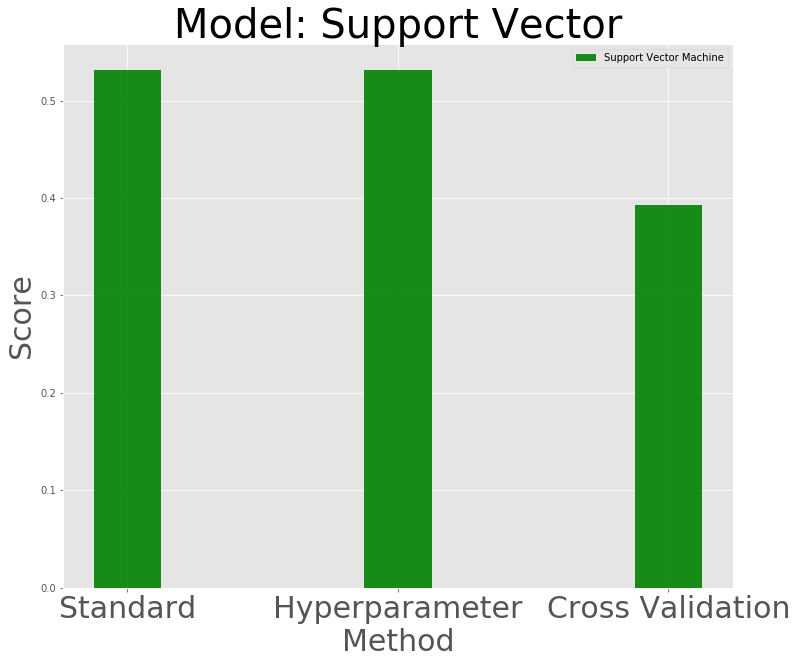

In [105]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,10)
plt.style.use('ggplot')
n = 3

svc=(svc_accuracy_score_svc_std,svc_accuracy_score_svc_std_h, b_accu_svc)
#svc=(svc_accuracy_score_svc_nor,svc_accuracy_score_svc_min,svc_accuracy_score_svc_robust,svc_accuracy_score_svc_std)
#Loo_CV_manual=(accu_svc,accu_lr,accu_rf)
#milan= (73, 43, 44, 70, 61)
#inter = (54, 59, 69, 46, 58)
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.25
opacity = 0.9
#ax.bar(index, lr, bar_width, alpha=opacity, color='r',
                #label='Logistic Regression')
ax.bar(index, svc, bar_width, alpha=opacity, color='g',label='Support Vector Machine')

#ax.bar(index+bar_width+bar_width, svc, bar_width, alpha=opacity, color='g', label='Support Vector Machine')
ax.set_xlabel('Method',fontsize=30)
ax.set_ylabel('Score',fontsize=30)
ax.set_title('Model: Support Vector',fontsize=40)
ax.set_xticks(index)
ax.set_xticklabels(('Standard','Hyperparameter', 'Cross Validation'),size=30)
ax.legend()
plt.savefig('../images/svc/SVC_STD_with_best_h_cv.png')
plt.show()

# Random Forest with best hyper meter minmax scale

In [106]:


### MinMax Distribution
rf_min_h= RandomForestClassifier(n_estimators=100,max_depth=30,min_samples_leaf=10,max_leaf_nodes=5)
#xx_train_min = mm_scaler.fit_transform(xx_train) ## SCale
rf_min_h.fit(xx_train_min, yy_train)
#xx_test_min = mm_scaler.fit_transform(xx_test)  #scale
predicted_value_rf_min_h = rf_min_h.predict(xx_test_min)
rf_accuracy_score_rf_min_h=calculate_accuracy_score(yy_test, predicted_value_rf_min_h)


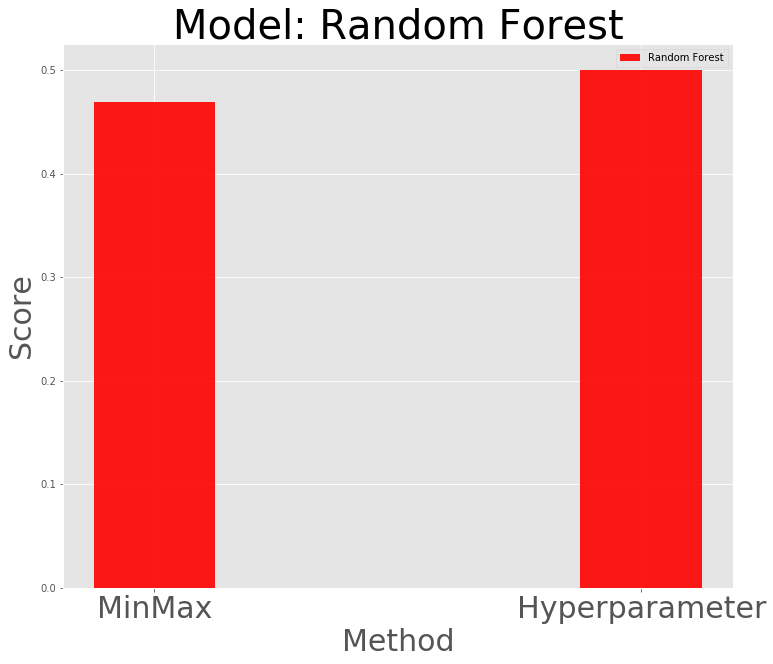

In [107]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,10)
plt.style.use('ggplot')
n = 2
rf=(rf_accuracy_score_rf_min,rf_accuracy_score_rf_min_h)

fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.25
opacity = 0.9
#ax.bar(index, lr, bar_width, alpha=opacity, color='r',
                #label='Logistic Regression')
ax.bar(index, rf, bar_width, alpha=opacity, color='r',label='Random Forest')

#ax.bar(index+bar_width+bar_width, svc, bar_width, alpha=opacity, color='g', label='Support Vector Machine')
ax.set_xlabel('Method',fontsize=30)
ax.set_ylabel('Score',fontsize=30)
ax.set_title('Model: Random Forest',fontsize=40)
ax.set_xticks(index)
ax.set_xticklabels(('MinMax','Hyperparameter'),size=30)
ax.legend()
plt.savefig('../images/Random/Random_Forest_min_max_with_best_h.png')
plt.show()

In [108]:
from sklearn.model_selection import KFold
from sklearn import preprocessing
s_scaler = preprocessing.MinMaxScaler()
#s_scaler = preprocessing.RobustScaler()
#s_scaler = preprocessing.StandardScaler()
rf_loo = RandomForestClassifier(n_estimators=100,max_depth=30,min_samples_leaf=10,max_leaf_nodes=5)
data_loo_m_new=pd.read_csv('../data_set/loo_train_test.csv')
data_loo_m_new=data_loo_m_new.drop('Unnamed: 0', 1)
data = data_loo_m_new
Team=data.iloc[:,0:2] # Team for check whether the test team is in the training team
X = data.iloc[:,0:86] # X for all feature selection including team name
y = data.iloc[:,-1] # Y for select the target column like winner
confusion_matrix_loo_rf=np.zeros((3, 3))
sum_accu=0
for j in range(10):
    for i in range(64):
        # It will test every row from the data set. Fistly, 0th row as test, other 94 as training
        team=Team.iloc[i] # select the teams which should be tested
        if ((team['team_1']==X['team_2']) & (team['team_2']==X['team_1'])).any(): # it will find out the index number of swaping team 
            k=X[((team['team_1']==X['team_2']) & (team['team_2']==X['team_1']))].index
     
    
        X_train=X.iloc[0:len(X)] # Every time it will Select the training set including testing and swaping team
        X_train=X_train.iloc[:, 2:86] # Now it will exclude the swaping team from the data set
    
        X_test1=X_train.iloc[i] # With index i , selecting the testing row
        X_test2=X_train.iloc[k]
        y_test1=y.iloc[i]# testing target value
        y_test2=y.iloc[k]
    
        X_train=X_train.drop(k) # drop the same tested team from training data set
        X_train=X_train.drop(i) #drop the testing row from the train set
   
        y_train=y.iloc[0:len(X)] # Select all target value including the testing and swaping team
        y_train=y_train.drop(k)  # drop the same tested team from training data set
        y_train=y_train.drop(i)  #drop the testing row from the train set
    
        X_train=X_train.values
        y_train=y_train.apply(to_float)
        y_train=y_train.values
   
    
    
        X_test1=X_test1.values
        X_test1=X_test1.reshape(1, -1)
        
        X_test2=X_test2.values
        if len(k)==1:
            X_test2=X_test2.reshape(1, -1)
            #print(int(y_test2))
            
            
       
        X_train = s_scaler.fit_transform(X_train)
        X_test1 = s_scaler.fit_transform(X_test1)
        X_test2 = s_scaler.fit_transform(X_test2)
        
        
        rf_loo.fit(X_train,y_train)
        predict1=rf_loo.predict(X_test1)
        confusion_matrix_loo_rf[int(y_test1)][int(predict1)]=confusion_matrix_loo_rf[int(y_test1)][int(predict1)]+1
        if len(k)==1:
            predict2=rf_loo.predict(X_test2)
            confusion_matrix_loo_rf[int(y_test2)][int(predict2)]=confusion_matrix_loo_rf[int(y_test2)][int(predict2)]+1
        else:
            for m in range(len(k)):
                X_test_m=X_test2[m]
                X_test_m=X_test_m.reshape(1, -1)
                predict2=rf_loo.predict(X_test_m)
                confusion_matrix_loo_rf[int(y_test2.iloc[m])][int(predict2)]=confusion_matrix_loo_rf[int(y_test2.iloc[m])][int(predict2)]+1
                

In [110]:
confusion_matrix_loo_rf

array([[  0.,   0., 260.],
       [  0.,   0., 520.],
       [  0.,   0., 520.]])

In [111]:
b_rf_tp_sum=confusion_matrix_loo_rf.diagonal().sum()
b_total_rf=confusion_matrix_loo_rf.sum()
b_accu_rf=b_rf_tp_sum/float(b_total_rf)

In [112]:
b_accu_rf

0.4

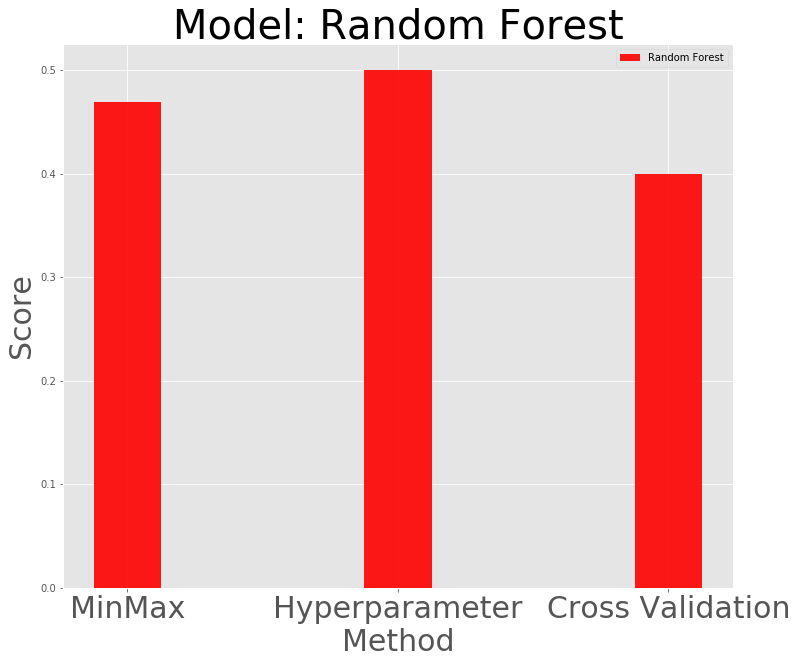

In [113]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,10)
plt.style.use('ggplot')
n = 3
#print("Manaully","Svc: ", accu_svc, "Lr: ", accu_lr, "RF ", accu_rf)
#print("From Scikit","Svc: ", al_svcr,"Lr: ", al_lr,"RF: ", al_rf)
#without_CV=(svc_accuracy_score,lr_accuracy_score,rf_accuracy_score)
#lr=(lr_accuracy_score_lr_nor,lr_accuracy_score_lr_min,lr_accuracy_score_lr_robust,lr_accuracy_score_lr_std)
rf=(rf_accuracy_score_rf_min,rf_accuracy_score_rf_min_h, b_accu_rf)
#svc=(svc_accuracy_score_svc_nor,svc_accuracy_score_svc_min,svc_accuracy_score_svc_robust,svc_accuracy_score_svc_std)
#Loo_CV_manual=(accu_svc,accu_lr,accu_rf)
#milan= (73, 43, 44, 70, 61)
#inter = (54, 59, 69, 46, 58)
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.25
opacity = 0.9
#ax.bar(index, lr, bar_width, alpha=opacity, color='r',
                #label='Logistic Regression')
ax.bar(index, rf, bar_width, alpha=opacity, color='r',label='Random Forest')

#ax.bar(index+bar_width+bar_width, svc, bar_width, alpha=opacity, color='g', label='Support Vector Machine')
ax.set_xlabel('Method',fontsize=30)
ax.set_ylabel('Score',fontsize=30)
ax.set_title('Model: Random Forest',fontsize=40)
ax.set_xticks(index)
ax.set_xticklabels(('MinMax','Hyperparameter', 'Cross Validation'),size=30)
ax.legend()
plt.savefig('../images/Random/Random_Forest_min_max_with_best_h_cv.png')
plt.show()

# Logistic regression with min max hyper meter

In [114]:

### MinMax Distribution
lr_min_h= LogisticRegression(penalty='l2',C=1.0, solver='newton-cg')
#xx_train_min = mm_scaler.fit_transform(xx_train) ## SCale
lr_min_h.fit(xx_train_min, yy_train)
#xx_test_min = mm_scaler.fit_transform(xx_test)  #scale
predicted_value_lr_min_h = lr_min_h.predict(xx_test_min)
lr_accuracy_score_lr_min_h=calculate_accuracy_score(yy_test, predicted_value_lr_min_h)


# Best parameter with best scaling

No handles with labels found to put in legend.


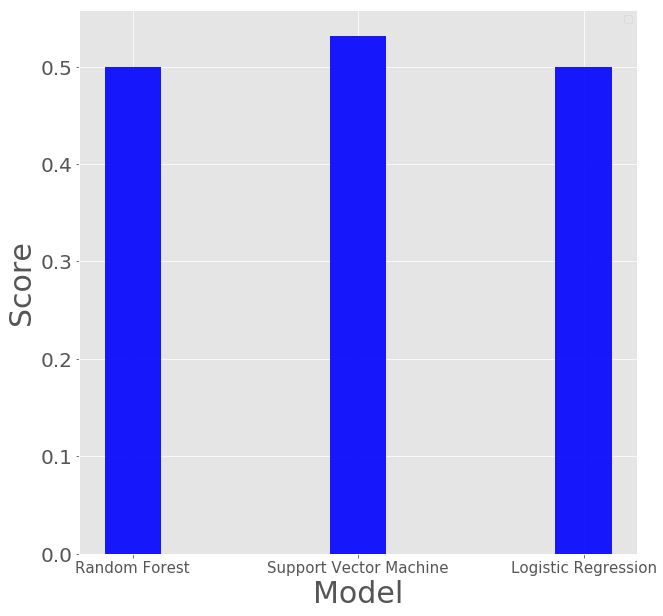

In [116]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,10)
plt.style.use('ggplot')
n = 3
#print("Manaully","Svc: ", accu_svc, "Lr: ", accu_lr, "RF ", accu_rf)
#print("From Scikit","Svc: ", al_svcr,"Lr: ", al_lr,"RF: ", al_rf)
hyper=(rf_accuracy_score_rf_min_h,svc_accuracy_score_svc_std_h,lr_accuracy_score_lr_min_h)
#lr=(lr_accuracy_score_lr_nor,lr_accuracy_score_lr_min,lr_accuracy_score_lr_robust,lr_accuracy_score_lr_std)
#rf=(rf_accuracy_score_rf_nor,rf_accuracy_score_rf_min,rf_accuracy_score_rf_robust,rf_accuracy_score_rf_std)
#svc=(svc_accuracy_score_svc_nor,svc_accuracy_score_svc_min,svc_accuracy_score_svc_robust,svc_accuracy_score_svc_std)
#Loo_CV_manual=(accu_svc,accu_lr,accu_rf)
#milan= (73, 43, 44, 70, 61)
#inter = (54, 59, 69, 46, 58)
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.25
opacity = 0.9
ax.bar(index, hyper, bar_width, alpha=opacity, color='b',)
#ax.bar(index, rf, bar_width, alpha=opacity, color='r',
                #label='Random Forest')
#ax.bar(index+bar_width, lr, bar_width, alpha=opacity, color='b',label='Logistic Regression')

#ax.bar(index+bar_width+bar_width, svc, bar_width, alpha=opacity, color='g', label='Support Vector Machine')
ax.set_xlabel('Model',fontsize=30)
ax.set_ylabel('Score',fontsize=30)
ax.tick_params(axis = 'y', which = 'major', labelsize = 20)
#ax.set_title('Model:Random',fontsize=40)
ax.set_xticks(index)
ax.set_xticklabels(('Random Forest','Support Vector Machine','Logistic Regression'),size=15)
ax.legend()
plt.savefig('../images/model_comparison_best_hyper.png')
plt.show()

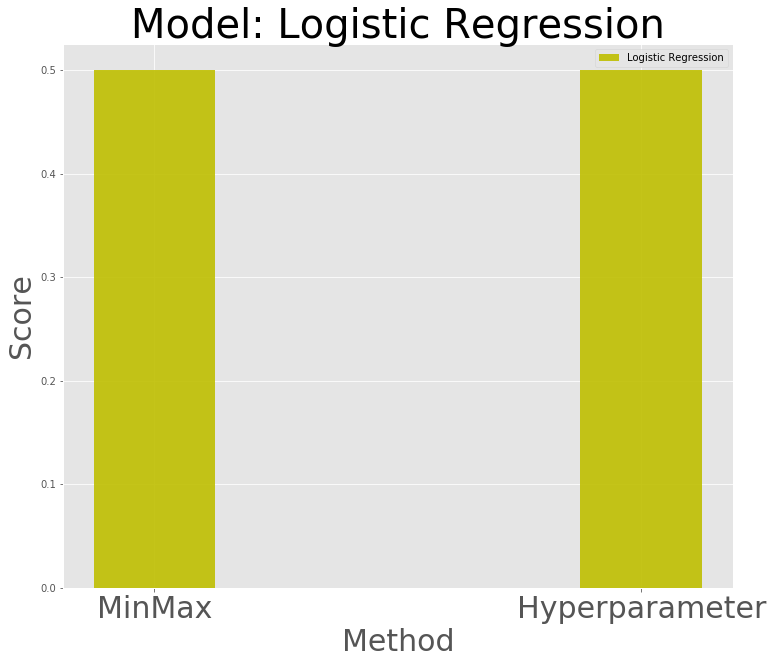

In [165]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,10)
plt.style.use('ggplot')
n = 2
lr=(lr_accuracy_score_lr_min,lr_accuracy_score_lr_min_h)

fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.25
opacity = 0.9
#ax.bar(index, lr, bar_width, alpha=opacity, color='r',
                #label='Logistic Regression')
ax.bar(index, lr, bar_width, alpha=opacity, color='y',label='Logistic Regression')

#ax.bar(index+bar_width+bar_width, svc, bar_width, alpha=opacity, color='g', label='Support Vector Machine')
ax.set_xlabel('Method',fontsize=30)
ax.set_ylabel('Score',fontsize=30)
ax.set_title('Model: Logistic Regression',fontsize=40)
ax.set_xticks(index)
ax.set_xticklabels(('MinMax','Hyperparameter'),size=30)
ax.legend()
plt.savefig('../images/LR/Logistic_min_max_with_best_h.png')
plt.show()

In [97]:
from sklearn.model_selection import KFold
from sklearn import preprocessing
s_scaler = preprocessing.MinMaxScaler()
#s_scaler = preprocessing.RobustScaler()
#s_scaler = preprocessing.StandardScaler()
lr_loo= LogisticRegression(penalty='l2',C=1.0, solver='newton-cg')
data_loo_m_new=pd.read_csv('../data_set/loo_train_test.csv')
data_loo_m_new=data_loo_m_new.drop('Unnamed: 0', 1)
data = data_loo_m_new
Team=data.iloc[:,0:2] # Team for check whether the test team is in the training team
X = data.iloc[:,0:86] # X for all feature selection including team name
y = data.iloc[:,-1] # Y for select the target column like winner
confusion_matrix_loo_lr=np.zeros((3, 3))
sum_accu=0
for j in range(10):
    for i in range(64):
        # It will test every row from the data set. Fistly, 0th row as test, other 94 as training
        team=Team.iloc[i] # select the teams which should be tested
        if ((team['team_1']==X['team_2']) & (team['team_2']==X['team_1'])).any(): # it will find out the index number of swaping team 
            k=X[((team['team_1']==X['team_2']) & (team['team_2']==X['team_1']))].index
     
    
        X_train=X.iloc[0:len(X)] # Every time it will Select the training set including testing and swaping team
        X_train=X_train.iloc[:, 2:86] # Now it will exclude the swaping team from the data set
    
        X_test1=X_train.iloc[i] # With index i , selecting the testing row
        X_test2=X_train.iloc[k]
        y_test1=y.iloc[i]# testing target value
        y_test2=y.iloc[k]
    
        X_train=X_train.drop(k) # drop the same tested team from training data set
        X_train=X_train.drop(i) #drop the testing row from the train set
   
        y_train=y.iloc[0:len(X)] # Select all target value including the testing and swaping team
        y_train=y_train.drop(k)  # drop the same tested team from training data set
        y_train=y_train.drop(i)  #drop the testing row from the train set
    
        X_train=X_train.values
        y_train=y_train.apply(to_float)
        y_train=y_train.values
   
    
    
        X_test1=X_test1.values
        X_test1=X_test1.reshape(1, -1)
        
        X_test2=X_test2.values
        if len(k)==1:
            X_test2=X_test2.reshape(1, -1)
            #print(int(y_test2))
            
            
       
        X_train = s_scaler.fit_transform(X_train)
        X_test1 = s_scaler.fit_transform(X_test1)
        X_test2 = s_scaler.fit_transform(X_test2)
        
        
        lr_loo.fit(X_train,y_train)
        predict1=lr_loo.predict(X_test1)
        confusion_matrix_loo_lr[int(y_test1)][int(predict1)]=confusion_matrix_loo_lr[int(y_test1)][int(predict1)]+1
        if len(k)==1:
            predict2=lr_loo.predict(X_test2)
            confusion_matrix_loo_lr[int(y_test2)][int(predict2)]=confusion_matrix_loo_lr[int(y_test2)][int(predict2)]+1
        else:
            for m in range(len(k)):
                X_test_m=X_test2[m]
                X_test_m=X_test_m.reshape(1, -1)
                predict2=lr_loo.predict(X_test_m)
                confusion_matrix_loo_lr[int(y_test2.iloc[m])][int(predict2)]=confusion_matrix_loo_lr[int(y_test2.iloc[m])][int(predict2)]+1
                

In [124]:
confusion_matrix_loo_svc

array([[  0.,   0., 260.],
       [  0., 140., 380.],
       [  0., 150., 370.]])

In [125]:
b_lr_tp_sum=confusion_matrix_loo_lr.diagonal().sum()
b_total_lr=confusion_matrix_loo_lr.sum()
b_accu_lr=b_lr_tp_sum/float(b_total_lr)

In [126]:
b_accu_lr

0.4

In [127]:
for i in [0,1,-1]:
    for j in [0,1,-1]:
        print(i,j,confusion_matrix_loo_rf[i][j])


0 0 0.0
0 1 0.0
0 -1 260.0
1 0 0.0
1 1 0.0
1 -1 520.0
-1 0 0.0
-1 1 0.0
-1 -1 520.0


In [128]:
rf_precision=calculate_precision_matrix(confusion_matrix_loo_rf)
rf_recall=calculate_recall_matrix(confusion_matrix_loo_rf)
rf_f_score=calculate_f_score_matrix(confusion_matrix_loo_rf)
rf_accuracy_class=calculate_accuracy_matrix_class(confusion_matrix_loo_rf)

In [129]:
rf_precision

[0.0, 0.0, 0.4]

In [130]:
rf_recall

[0.0, 0.0, 1.0]

In [131]:
svc_f_score

[0.0, 0.345679012345679, 0.4836601307189543]

In [132]:
rf_accuracy_class[-1]

0.4

#  Logistic Regression

# TP, TN,FP,FN

In [133]:
def TP_calculate(df_confusion):
    class_target=[-1,0,1]
    TP= [0,0,0]
    TP[-1]=0
    TP[1]=0
    TP[0]=0
    for t in class_target:
        TP[t]=df_confusion[t][t]
        #print('True Positve',t, TP[t])
    return TP
def TN_calculate(df_confusion):
    class_target=[-1,0,1]
    TN= [0,0,0]
    TN[-1]=0
    TN[1]=0
    TN[0]=0
    for t in class_target:
        for p in class_target:
            if t!=-1 and p!=-1:
                TN[-1]=TN[-1]+df_confusion[t][p]
            if t!=1 and p!=1:
                TN[1]=TN[1]+df_confusion[t][p]
            if t!=0 and p!=0:
                TN[0]=TN[0]+df_confusion[t][p]
    return TN
def FP_calculate(df_confusion):
    class_target=[-1,0,1]
    FP= [0,0,0]
    FP[-1]=0
    FP[1]=0
    FP[0]=0
    for p in class_target:
        for t in class_target:
            if t==p:
                continue
            else:
                FP[p]=FP[p]+df_confusion[t][p]
        #print('False positive of',p, FP[p])
    return FP
def FN_calculate(df_confusion):
    class_target=[-1,0,1]
    FN= [0,0,0]
    FN[-1]=0
    FN[1]=0
    FN[0]=0
    for t in class_target:
        for p in class_target:
            if t==p:
                continue
            else:
                FN[t]=FN[t]+df_confusion[t][p]
        #print('False negative',t, FN[t])
    return FN


# Precision, Recall, F-1 SCore, accuracy, : class wise

In [134]:
def calculate_precision_matrix(confusion_matrix):
    class_target=[-1,0,1]
    precision= [0.0,0.0,0.0]
    precision[0]=0.0
    precision[-1]=0.0
    precision[1]=0.0
    TP=TP_calculate(confusion_matrix)
    #print('True positve',TP)
    FP=FP_calculate(confusion_matrix)
    #print('False positve',FP)
    for i in class_target:
        if TP[i]==0:
            precision[i]=0.0
        else:
            precision[i]=TP[i]/float(TP[i]+FP[i])
    return precision
def calculate_recall_matrix(confusion_matrix):
    class_target=[-1,0,1]
    recall= [0.0,0.0,0.0]
    recall[0]=0.0
    recall[1]=0.0
    recall[-1]=0.0
    TP=TP_calculate(confusion_matrix)
    #TN=TN_calculate(confusion_matrix)
    #FP=FP_calculate(confusion_matrix)
    FN=FN_calculate(confusion_matrix)
    for x in class_target:
        if TP[x]==0:
            recall[x]=0.0
        else:
            recall[x]=(TP[x])/float((TP[x])+(FN[x]))
    return recall
def calculate_f_score_matrix(confusion_matrix):
    class_target=[-1,0,1]
    f_score= [0.0,0.0,0.0]
    f_score[0]=0.0
    f_score[1]=0.0
    f_score[-1]=0.0
    #confusion_matrix=calculate_confusion_matrix(actual_value, predicted_value)
    precision=calculate_precision_matrix(confusion_matrix)
    recall=calculate_recall_matrix(confusion_matrix)
    for y in class_target:
        if recall[y]==0 or precision[y]==0:
            f_score[y]=0.0
        else:
            f_score[y]=(2.0*recall[y]*precision[y])/float(recall[y]+precision[y])
    return f_score
def calculate_accuracy_matrix_class(confusion_matrix):
    class_target=[-1,0,1]
    accuracy= [0.0,0.0,0.0]
    accuracy[0]=0.0
    accuracy[1]=0.0
    accuracy[-1]=0.0
    TP=TP_calculate(confusion_matrix)
    TN=TN_calculate(confusion_matrix)
    FP=FP_calculate(confusion_matrix)
    FN=FN_calculate(confusion_matrix)
    #print(TP, TN)
    for z in class_target:
        accuracy[z]=(TP[z]+TN[z])/float(TP[z]+TN[z]+FP[z]+FN[z])
    return accuracy

# Precision: Random

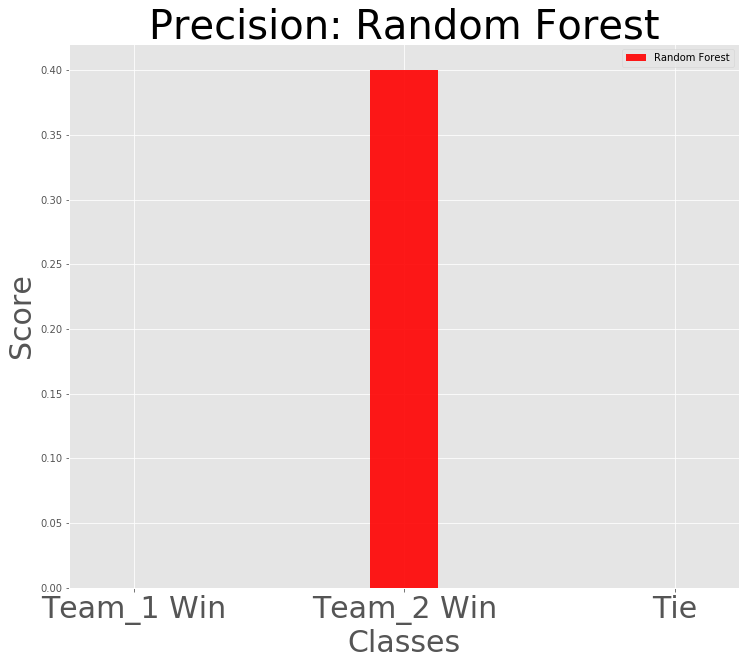

In [135]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,10)
plt.style.use('ggplot')
n = 3
#print("Manaully","Svc: ", accu_svc, "Lr: ", accu_lr, "RF ", accu_rf)
#print("From Scikit","Svc: ", al_svcr,"Lr: ", al_lr,"RF: ", al_rf)
#without_CV=(svc_accuracy_score,lr_accuracy_score,rf_accuracy_score)
#lr=(lr_accuracy_score_lr_nor,lr_accuracy_score_lr_min,lr_accuracy_score_lr_robust,lr_accuracy_score_lr_std)
rf=(rf_precision[1],rf_precision[-1], rf_precision[0])
#svc=(svc_accuracy_score_svc_nor,svc_accuracy_score_svc_min,svc_accuracy_score_svc_robust,svc_accuracy_score_svc_std)
#Loo_CV_manual=(accu_svc,accu_lr,accu_rf)
#milan= (73, 43, 44, 70, 61)
#inter = (54, 59, 69, 46, 58)
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.25
opacity = 0.9
#ax.bar(index, lr, bar_width, alpha=opacity, color='r',
                #label='Logistic Regression')
ax.bar(index, rf, bar_width, alpha=opacity, color='r',label='Random Forest')

#ax.bar(index+bar_width+bar_width, svc, bar_width, alpha=opacity, color='g', label='Support Vector Machine')
ax.set_xlabel('Classes',fontsize=30)
ax.set_ylabel('Score',fontsize=30)
ax.set_title('Precision: Random Forest',fontsize=40)
ax.set_xticks(index)
ax.set_xticklabels(('Team_1 Win','Team_2 Win', 'Tie'),size=30)
ax.legend()
plt.savefig('../images/Random_Forest_precision.png')
plt.show()

# Recall: Random

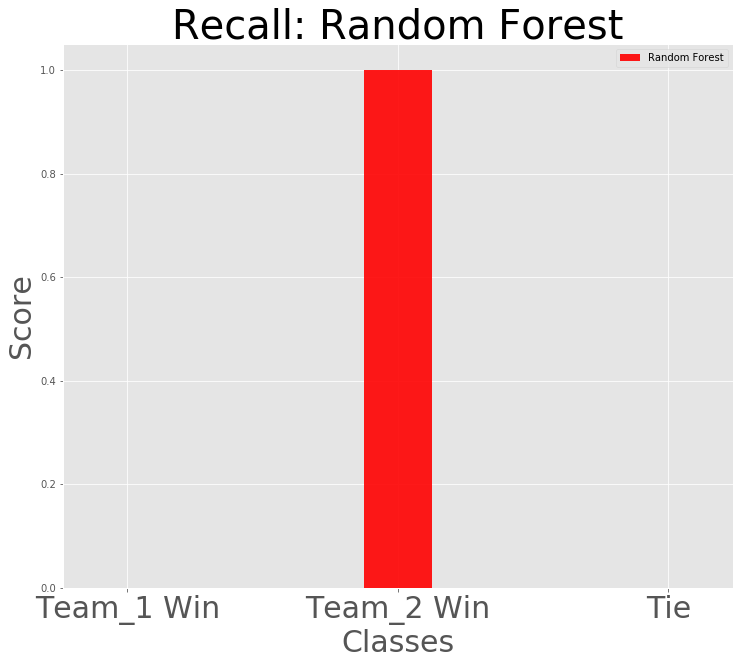

In [62]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,10)
plt.style.use('ggplot')
n = 3
#print("Manaully","Svc: ", accu_svc, "Lr: ", accu_lr, "RF ", accu_rf)
#print("From Scikit","Svc: ", al_svcr,"Lr: ", al_lr,"RF: ", al_rf)
#without_CV=(svc_accuracy_score,lr_accuracy_score,rf_accuracy_score)
#lr=(lr_accuracy_score_lr_nor,lr_accuracy_score_lr_min,lr_accuracy_score_lr_robust,lr_accuracy_score_lr_std)
rf=(rf_recall[1],rf_recall[-1], rf_recall[0])
#svc=(svc_accuracy_score_svc_nor,svc_accuracy_score_svc_min,svc_accuracy_score_svc_robust,svc_accuracy_score_svc_std)
#Loo_CV_manual=(accu_svc,accu_lr,accu_rf)
#milan= (73, 43, 44, 70, 61)
#inter = (54, 59, 69, 46, 58)
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.25
opacity = 0.9
#ax.bar(index, lr, bar_width, alpha=opacity, color='r',
                #label='Logistic Regression')
ax.bar(index, rf, bar_width, alpha=opacity, color='r',label='Random Forest')

#ax.bar(index+bar_width+bar_width, svc, bar_width, alpha=opacity, color='g', label='Support Vector Machine')
ax.set_xlabel('Classes',fontsize=30)
ax.set_ylabel('Score',fontsize=30)
ax.set_title('Recall: Random Forest',fontsize=40)
ax.set_xticks(index)
ax.set_xticklabels(('Team_1 Win','Team_2 Win', 'Tie'),size=30)
ax.legend()
plt.savefig('../images/Random_Forest_recall.png')
plt.show()

# F-1 Score

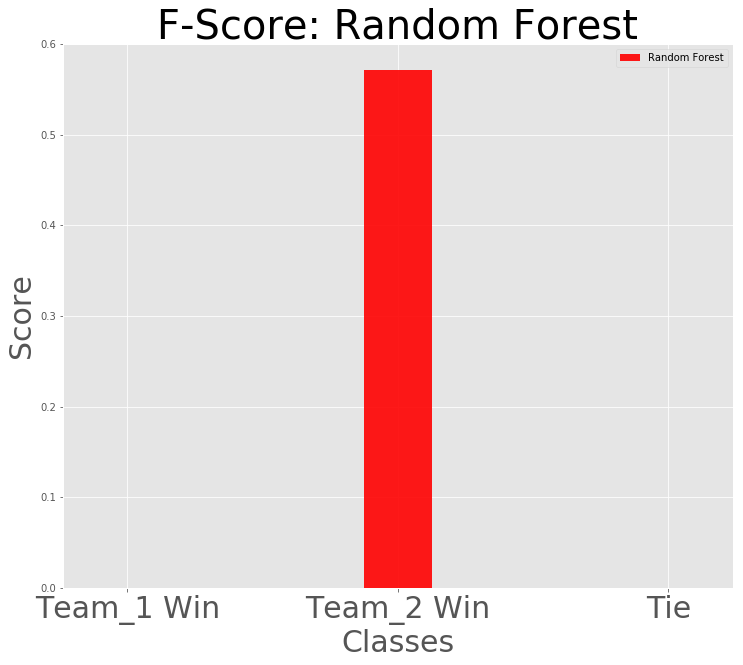

In [63]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,10)
plt.style.use('ggplot')
n = 3
#print("Manaully","Svc: ", accu_svc, "Lr: ", accu_lr, "RF ", accu_rf)
#print("From Scikit","Svc: ", al_svcr,"Lr: ", al_lr,"RF: ", al_rf)
#without_CV=(svc_accuracy_score,lr_accuracy_score,rf_accuracy_score)
#lr=(lr_accuracy_score_lr_nor,lr_accuracy_score_lr_min,lr_accuracy_score_lr_robust,lr_accuracy_score_lr_std)
rf=(rf_f_score[1],rf_f_score[-1], rf_f_score[0])
#svc=(svc_accuracy_score_svc_nor,svc_accuracy_score_svc_min,svc_accuracy_score_svc_robust,svc_accuracy_score_svc_std)
#Loo_CV_manual=(accu_svc,accu_lr,accu_rf)
#milan= (73, 43, 44, 70, 61)
#inter = (54, 59, 69, 46, 58)
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.25
opacity = 0.9
#ax.bar(index, lr, bar_width, alpha=opacity, color='r',
                #label='Logistic Regression')
ax.bar(index, rf, bar_width, alpha=opacity, color='r',label='Random Forest')

#ax.bar(index+bar_width+bar_width, svc, bar_width, alpha=opacity, color='g', label='Support Vector Machine')
ax.set_xlabel('Classes',fontsize=30)
ax.set_ylabel('Score',fontsize=30)
ax.set_title('F-Score: Random Forest',fontsize=40)
ax.set_xticks(index)
ax.set_xticklabels(('Team_1 Win','Team_2 Win', 'Tie'),size=30)
ax.legend()
plt.savefig('../images/Random_Forest_F-score.png')
plt.show()

# Accuracy-class- Randaom

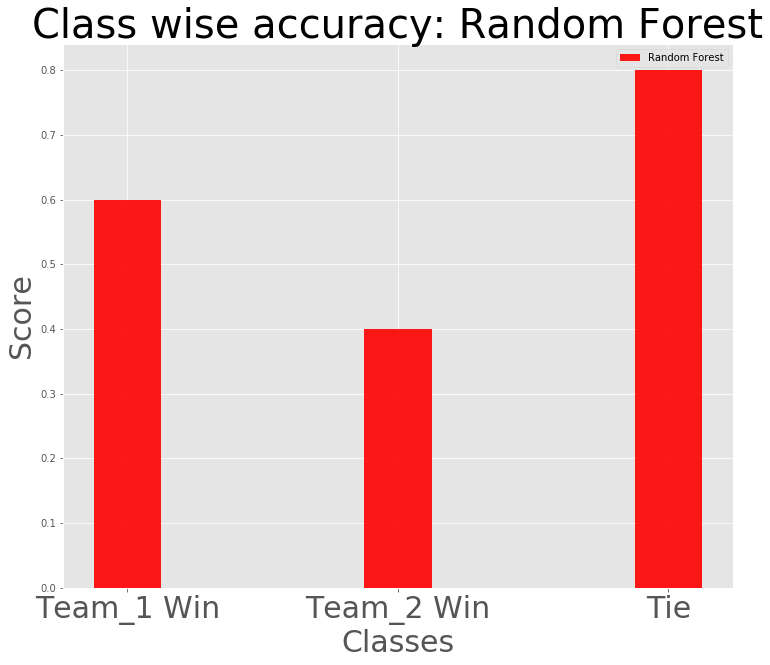

In [64]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,10)
plt.style.use('ggplot')
n = 3
#print("Manaully","Svc: ", accu_svc, "Lr: ", accu_lr, "RF ", accu_rf)
#print("From Scikit","Svc: ", al_svcr,"Lr: ", al_lr,"RF: ", al_rf)
#without_CV=(svc_accuracy_score,lr_accuracy_score,rf_accuracy_score)
#lr=(lr_accuracy_score_lr_nor,lr_accuracy_score_lr_min,lr_accuracy_score_lr_robust,lr_accuracy_score_lr_std)
rf=(rf_accuracy_class[1],rf_accuracy_class[-1], rf_accuracy_class[0])
#svc=(svc_accuracy_score_svc_nor,svc_accuracy_score_svc_min,svc_accuracy_score_svc_robust,svc_accuracy_score_svc_std)
#Loo_CV_manual=(accu_svc,accu_lr,accu_rf)
#milan= (73, 43, 44, 70, 61)
#inter = (54, 59, 69, 46, 58)
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.25
opacity = 0.9
#ax.bar(index, lr, bar_width, alpha=opacity, color='r',
                #label='Logistic Regression')
ax.bar(index, rf, bar_width, alpha=opacity, color='r',label='Random Forest')

#ax.bar(index+bar_width+bar_width, svc, bar_width, alpha=opacity, color='g', label='Support Vector Machine')
ax.set_xlabel('Classes',fontsize=30)
ax.set_ylabel('Score',fontsize=30)
ax.set_title('Class wise accuracy: Random Forest',fontsize=40)
ax.set_xticks(index)
ax.set_xticklabels(('Team_1 Win','Team_2 Win', 'Tie'),size=30)
ax.legend()
plt.savefig('../images/Random_Forest_Accuracy_class.png')
plt.show()

# Overall:performance: Random Forest

In [136]:
import statistics
rf_precision_overall=statistics.mean(rf_precision)
rf_recall_overall=statistics.mean(rf_recall)
rf_f_overall=statistics.mean(rf_f_score)
rf_accuracy_overall=statistics.mean(rf_accuracy_class)


In [137]:
#lr_f_overall=statistics.mean(lr_f_score)
svc_f_overall=statistics.mean(svc_f_score)
svc_precision_overall=statistics.mean(svc_precision)
svc_recall_overall=statistics.mean(svc_recall)
#rf_accuracy_overall=statistics.mean(rf_accuracy_class)

In [138]:
svc_f_overall

0.27644638102154445

In [139]:
svc_precision_overall

0.2830317514510072

In [140]:
svc_recall_overall

0.3269230769230769

In [141]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,10)
plt.style.use('ggplot')
n = 3
#print("Manaully","Svc: ", accu_svc, "Lr: ", accu_lr, "RF ", accu_rf)
#print("From Scikit","Svc: ", al_svcr,"Lr: ", al_lr,"RF: ", al_rf)
overall_precision=(rf_f_overall,svc_f_overall,lr_f_overall)
#lr=(lr_accuracy_score_lr_nor,lr_accuracy_score_lr_min,lr_accuracy_score_lr_robust,lr_accuracy_score_lr_std)
#rf=(rf_accuracy_score_rf_nor,rf_accuracy_score_rf_min,rf_accuracy_score_rf_robust,rf_accuracy_score_rf_std)
#svc=(svc_accuracy_score_svc_nor,svc_accuracy_score_svc_min,svc_accuracy_score_svc_robust,svc_accuracy_score_svc_std)
#Loo_CV_manual=(accu_svc,accu_lr,accu_rf)
#milan= (73, 43, 44, 70, 61)
#inter = (54, 59, 69, 46, 58)
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.25
opacity = 0.9
ax.bar(index, hyper, bar_width, alpha=opacity, color='y',)
#ax.bar(index, rf, bar_width, alpha=opacity, color='r',
                #label='Random Forest')
#ax.bar(index+bar_width, lr, bar_width, alpha=opacity, color='b',label='Logistic Regression')

#ax.bar(index+bar_width+bar_width, svc, bar_width, alpha=opacity, color='g', label='Support Vector Machine')
ax.set_xlabel('Model',fontsize=30)
ax.set_ylabel('Score',fontsize=30)
#ax.set_title('F1-score Model Comparison',fontsize=40)
ax.set_xticks(index)
ax.set_xticklabels(('Random Forest','Support Vector Machine','Logistic Regression'),size=15)
ax.legend()
plt.savefig('../images/model_comparison_precision.png')
plt.show()

NameError: name 'lr_f_overall' is not defined

# All model comparison: F-score

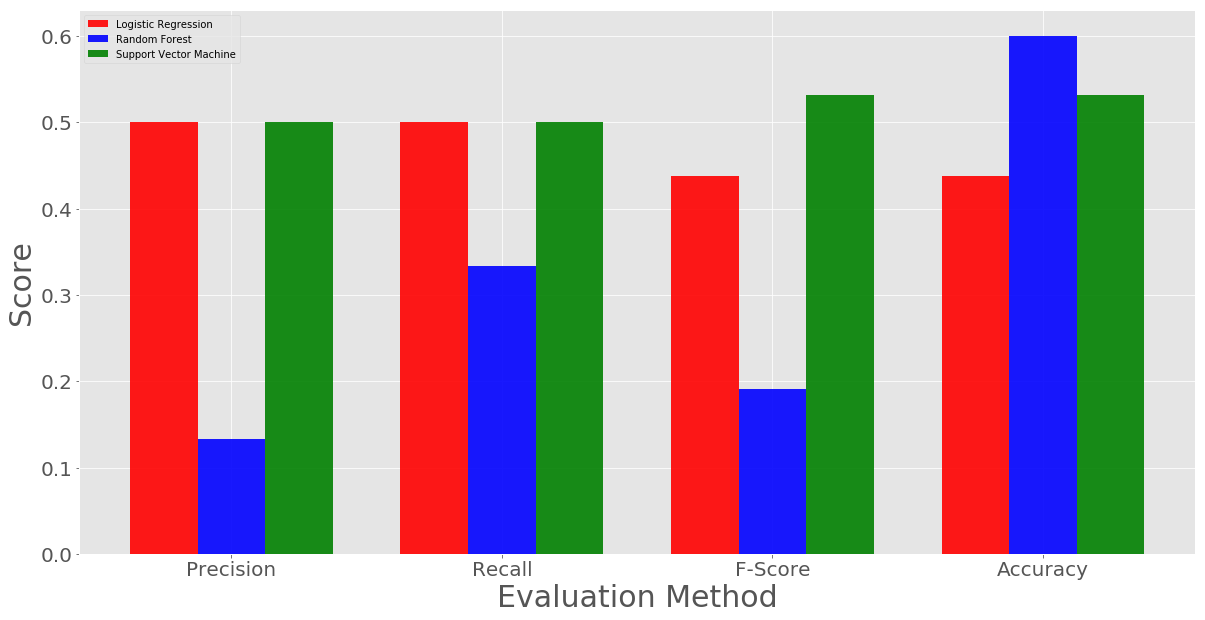

In [146]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')
n = 4
#print("Manaully","Svc: ", accu_svc, "Lr: ", accu_lr, "RF ", accu_rf)
#print("From Scikit","Svc: ", al_svcr,"Lr: ", al_lr,"RF: ", al_rf)
#without_CV=(svc_accuracy_score,lr_accuracy_score,rf_accuracy_score)
lr=(lr_accuracy_score_lr_nor,lr_accuracy_score_lr_min,lr_accuracy_score_lr_robust,lr_accuracy_score_lr_std)
rf=(rf_precision_overall,rf_recall_overall,rf_f_overall, rf_accuracy_overall)
svc=(svc_accuracy_score_svc_nor,svc_accuracy_score_svc_min,svc_accuracy_score_svc_robust,svc_accuracy_score_svc_std)
#Loo_CV_manual=(accu_svc,accu_lr,accu_rf)
#milan= (73, 43, 44, 70, 61)
#inter = (54, 59, 69, 46, 58)
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.25
opacity = 0.9
ax.bar(index, lr, bar_width, alpha=opacity, color='r',
                label='Logistic Regression')
ax.bar(index+bar_width, rf, bar_width, alpha=opacity, color='b',label='Random Forest')
ax.bar(index+bar_width+bar_width, svc, bar_width, alpha=opacity, color='g', label='Support Vector Machine')
       
ax.tick_params(axis = 'y', which = 'major', labelsize = 20)
ax.set_xlabel('Evaluation Method',fontsize=30)
ax.set_ylabel('Score',fontsize=30)
#ax.set_title('Over all performance: Random Forest',fontsize=40)
ax.set_xticks(index+bar_width)
ax.set_xticklabels(('Precision','Recall', 'F-Score', 'Accuracy'),size=20)
ax.legend()
plt.savefig('../images/overall_performance.png')
plt.show()

No handles with labels found to put in legend.


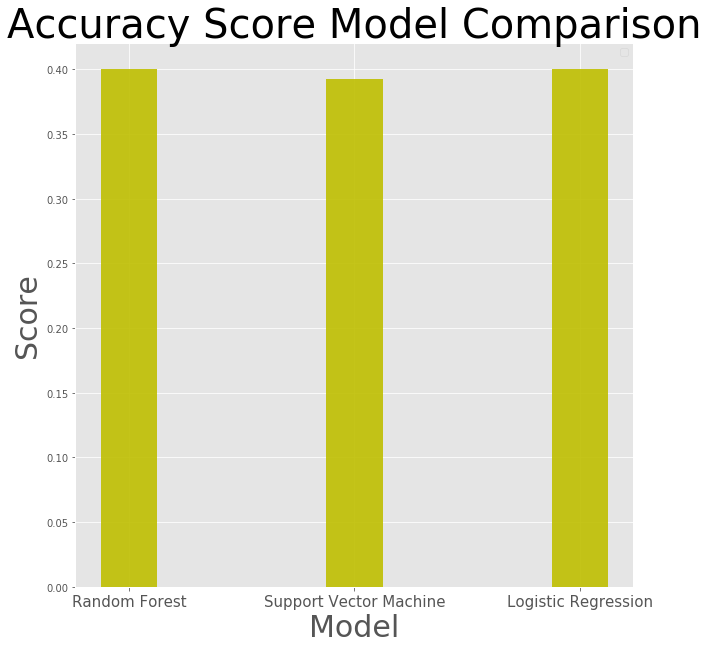

In [213]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,10)
plt.style.use('ggplot')
n = 3
#print("Manaully","Svc: ", accu_svc, "Lr: ", accu_lr, "RF ", accu_rf)
#print("From Scikit","Svc: ", al_svcr,"Lr: ", al_lr,"RF: ", al_rf)
cv=(b_accu_rf,b_accu_svc,b_accu_lr)
#lr=(lr_accuracy_score_lr_nor,lr_accuracy_score_lr_min,lr_accuracy_score_lr_robust,lr_accuracy_score_lr_std)
#rf=(rf_accuracy_score_rf_nor,rf_accuracy_score_rf_min,rf_accuracy_score_rf_robust,rf_accuracy_score_rf_std)
#svc=(svc_accuracy_score_svc_nor,svc_accuracy_score_svc_min,svc_accuracy_score_svc_robust,svc_accuracy_score_svc_std)
#Loo_CV_manual=(accu_svc,accu_lr,accu_rf)
#milan= (73, 43, 44, 70, 61)
#inter = (54, 59, 69, 46, 58)
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.25
opacity = 0.9
ax.bar(index, cv, bar_width, alpha=opacity, color='y',)
#ax.bar(index, rf, bar_width, alpha=opacity, color='r',
                #label='Random Forest')
#ax.bar(index+bar_width, lr, bar_width, alpha=opacity, color='b',label='Logistic Regression')

#ax.bar(index+bar_width+bar_width, svc, bar_width, alpha=opacity, color='g', label='Support Vector Machine')
ax.set_xlabel('Model',fontsize=30)
ax.set_ylabel('Score',fontsize=30)
ax.set_title('Accuracy Score Model Comparison',fontsize=40)
ax.set_xticks(index)
ax.set_xticklabels(('Random Forest','Support Vector Machine','Logistic Regression'),size=15)
ax.legend()
plt.savefig('../images/model_model_comparison_best_hyper_cv.png')
plt.show()

In [31]:
def match_prediction(wc,happy,scale,team1,team2,model):
    match = pd.DataFrame(columns=['fifa_rank1', 'avg_age1','elo1', 'star_count1', 'coach_performance1', 'home_country_adv1','home_continent_adv1', 'last_best_performance1', 'final1', 'semi1','foreign_club1', 'att1', 'def1', 'mid1', 'ovr1', 'power_index1','offensive1', 'defensive1', 'avg_players_appearance1','avg_players_goal1', 'gdp1', 'population1', 'country_happiness_rank1','happiness_score1', 'life_expectancy1', 'freedom1', 'generosity1','goverment_corruption1', 'fifa_rank2', 'avg_age2', 'elo2','star_count2', 'coach_performance2', 'home_country_adv2','home_continent_adv2', 'last_best_performance2', 'final2', 'semi2','foreign_club2', 'att2', 'def2', 'mid2', 'ovr2', 'power_index2','offensive2', 'defensive2', 'avg_players_appearance2','avg_players_goal2', 'gdp2', 'population2', 'country_happiness_rank2','happiness_score2', 'life_expectancy2', 'freedom2', 'generosity2','goverment_corruption2', 'fifa_rank', 'elo', 'avg_age','home_country_adv', 'home_continent_adv', 'last_best_performance','star_count', 'coach_performance', 'final', 'semi', 'foreign_club','att', 'def', 'mid', 'ovr', 'power_index', 'offensive', 'defensive','avg_players_appearance', 'avg_players_goal', 'country_happiness_rank','gdp', 'population', 'happiness_score', 'life_expectancy', 'freedom','generosity', 'goverment_corruption'], index=[0])
    match['fifa_rank1'] = wc[wc.country == team1]['fifa_rank'].iloc[0]
    match['gdp1'] = wc[wc.country == team1]['gdp_rank'].iloc[0]
    match['population1'] = wc[wc.country == team1]['population_rank'].iloc[0]
    match['elo1'] = wc[wc.country == team1]['elo_ranking'].iloc[0]
    match['avg_age1'] = wc[wc.country == team1]['avg_age'].iloc[0]
    match['home_country_adv1'] = wc[wc.country == team1]['home_country_adv'].iloc[0]
    match['home_continent_adv1'] = wc[wc.country == team1]['home_continent_adv'].iloc[0]
    match['last_best_performance1'] = wc[wc.country == team1]['last_best_performance'].iloc[0]
    match['star_count1'] = wc[wc.country == team1]['star_count'].iloc[0]
    match['coach_performance1'] = wc[wc.country == team1]['coach_performance'].iloc[0]
    match['final1'] = wc[wc.country == team1]['Previous_final'].iloc[0]
    match['semi1'] = wc[wc.country == team1]['Previous_semi_final'].iloc[0]
    match['foreign_club1'] = wc[wc.country == team1]['% of player in foreign club'].iloc[0]
    match['att1'] = wc[wc.country == team1]['att'].iloc[0]
    match['def1'] = wc[wc.country == team1]['def'].iloc[0]
    match['mid1'] = wc[wc.country == team1]['mid'].iloc[0]
    match['ovr1'] = wc[wc.country == team1]['ovr'].iloc[0]
    
    match['power_index1'] = wc[wc.country == team1]['spi'].iloc[0]
    match['offensive1'] = wc[wc.country == team1]['global_o'].iloc[0]
    match['defensive1'] = wc[wc.country == team1]['global_d'].iloc[0]
    match['avg_players_appearance1'] = wc[wc.country == team1]['avg_players_appearance'].iloc[0]
    match['avg_players_goal1'] = wc[wc.country == team1]['avg_players_goal'].iloc[0]
    match['happiness_score1'] = wc[wc.country == team1]['Happiness.Score'].iloc[0]
    match['country_happiness_rank1'] = happy[happy.country == team1]['Happiness.Rank'].iloc[0]
    match['life_expectancy1'] = wc[wc.country == team1]['Health..Life.Expectancy.'].iloc[0]
    match['generosity1'] = wc[wc.country == team1]['Generosity'].iloc[0]
    match['freedom1'] = wc[wc.country == team1]['Freedom'].iloc[0]
    match['goverment_corruption1'] = wc[wc.country == team1]['Trust..Government.Corruption.'].iloc[0]
    
    
    
    match['fifa_rank2'] = wc[wc.country == team2]['fifa_rank'].iloc[0]
    match['gdp2'] = wc[wc.country == team2]['gdp_rank'].iloc[0]
    match['population2'] = wc[wc.country == team2]['population_rank'].iloc[0]
    match['elo2'] = wc[wc.country == team2]['elo_ranking'].iloc[0]
    match['avg_age2'] = wc[wc.country == team2]['avg_age'].iloc[0]
    match['home_country_adv2'] = wc[wc.country == team2]['home_country_adv'].iloc[0]
    match['home_continent_adv2'] = wc[wc.country == team2]['home_continent_adv'].iloc[0]
    match['last_best_performance2'] = wc[wc.country == team2]['last_best_performance'].iloc[0]
    match['star_count2'] = wc[wc.country == team2]['star_count'].iloc[0]
    match['coach_performance2'] = wc[wc.country == team2]['coach_performance'].iloc[0]
    match['final2'] = wc[wc.country == team2]['Previous_final'].iloc[0]
    match['semi2'] = wc[wc.country == team2]['Previous_semi_final'].iloc[0]
    match['foreign_club2'] = wc[wc.country == team2]['% of player in foreign club'].iloc[0]
    match['att2'] = wc[wc.country == team2]['att'].iloc[0]
    match['def2'] = wc[wc.country == team2]['def'].iloc[0]
    match['mid2'] = wc[wc.country == team2]['mid'].iloc[0]
    match['ovr2'] = wc[wc.country == team2]['ovr'].iloc[0]
    match['power_index2'] = wc[wc.country == team2]['spi'].iloc[0]
    match['offensive2'] = wc[wc.country == team2]['global_o'].iloc[0]
    match['defensive2'] = wc[wc.country == team2]['global_d'].iloc[0]
    match['avg_players_appearance2'] = wc[wc.country == team2]['avg_players_appearance'].iloc[0]
    match['avg_players_goal2'] = wc[wc.country == team2]['avg_players_goal'].iloc[0]
    match['happiness_score2'] = wc[wc.country == team2]['Happiness.Score'].iloc[0]
    match['country_happiness_rank2'] = happy[happy.country == team2]['Happiness.Rank'].iloc[0]
    match['life_expectancy2'] = wc[wc.country == team2]['Health..Life.Expectancy.'].iloc[0]
    match['generosity2'] = wc[wc.country == team2]['Generosity'].iloc[0]
    match['freedom2'] = wc[wc.country == team2]['Freedom'].iloc[0]
    match['goverment_corruption2'] = wc[wc.country == team2]['Trust..Government.Corruption.'].iloc[0]
    
   
    match['fifa_rank'] = match['fifa_rank1'] - match['fifa_rank2']
    match['gdp'] = match['gdp1'] - match['gdp2']
    match['population'] = match['population1'] - match['population2']
    match['avg_age'] = match['avg_age1'] - match['avg_age2']
    match['elo'] = match['elo1'] - match['elo2']
    match['home_country_adv'] = match['home_country_adv1'] - match['home_country_adv2']
    match['home_continent_adv'] = match['home_continent_adv1'] - match['home_continent_adv2']
    match['last_best_performance'] = match['last_best_performance1'] - match['last_best_performance2']
    match['star_count'] = match['star_count1'] - match['star_count2']
    match['coach_performance'] = match['coach_performance1'] - match['coach_performance2']
    match['foreign_club'] = match['foreign_club1'] - match['foreign_club2']
    match['final'] = match['final1'] - match['final2']
    match['semi'] = match['semi1'] - match['semi2']
    match['def'] = match['def1'] - match['def2']
    match['att'] = match['att1'] - match['att2']
    match['mid'] = match['mid1'] - match['mid2']
    match['ovr'] = match['ovr1'] - match['ovr2']
    match['power_index'] = match['power_index1']-match['power_index2']
    match['offensive'] = match['offensive1']-match['offensive2']
    match['defensive'] = match['defensive1']-match['defensive2']
    match['avg_players_appearance'] = match['avg_players_appearance1']-match['avg_players_appearance2']
    match['avg_players_goal'] = match['avg_players_goal1']-match['avg_players_goal2']
    match['country_happiness_rank'] = match['country_happiness_rank1']-match['country_happiness_rank2']
    match['happiness_score'] = match['happiness_score1']-match['happiness_score2']
    match['life_expectancy'] = match['life_expectancy1']-match['life_expectancy2']
    match['generosity'] = match['generosity1']-match['generosity2']
    match['freedom'] = match['freedom1']-match['freedom2']
    match['goverment_corruption'] = match['goverment_corruption1']-match['goverment_corruption2']
    

    match_array = s_scaler.fit_transform(match)
    match_array = match.values

    predict_fract=model.predict_proba(match_array)
    prediction = model.predict(match_array)
    #print(predict_fract)
    
    winner = None
    
    if prediction == 1:
        print("Winner: " + team1)
    elif prediction == -1:
        print("Winner: " + team2)
    else:
        print("The match will be draw")
    
    
    print("*** Probability ***")
    print("The probability of winning "+team1+ " "+ '%.2f'%(predict_fract[0][2]*100)+"%")
    print("The probability of winning "+team2+ " " +'%.2f'%(predict_fract[0][0]*100)+"%")
    print("The probability of draw: " '%.2f'%(predict_fract[0][1]*100)+"%")
   

In [32]:
integrate_features=pd.read_csv('../data_set/Team_wise_all_features.csv')
integrate_features=integrate_features.drop('Unnamed: 0', 1)
integrate_features_happy=pd.read_csv('../data_set/spi_player_happiness.csv')
integrate_features_happy=integrate_features_happy.drop('Unnamed: 0', 1)

In [33]:
s_scaler = preprocessing.StandardScaler()

In [37]:
match_prediction(integrate_features,integrate_features_happy, s_scaler, 'france', 'croatia', svc_loo)

Winner: france
*** Probability ***
The probability of winning france 100.00%
The probability of winning croatia 0.00%
The probability of draw: 0.00%


In [61]:
match_prediction(integrate_features,integrate_features_happy, s_scaler, 'brazil', 'germany', svc_loo)

Winner: brazil
*** Probability ***
The probability of winning brazil 62.74%
The probability of winning germany 37.17%
The probability of draw: 0.09%


In [39]:
integrate_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 28 columns):
country                          32 non-null object
fifa_rank                        32 non-null int64
gdp_rank                         32 non-null int64
population_rank                  32 non-null int64
avg_age                          32 non-null float64
elo_ranking                      32 non-null int64
star_count                       32 non-null int64
coach_performance                32 non-null int64
home_country_adv                 32 non-null int64
home_continent_adv               32 non-null int64
% of player in foreign club      32 non-null float64
Previous_final                   32 non-null int64
Previous_semi_final              32 non-null int64
last_best_performance            32 non-null int64
att                              32 non-null int64
mid                              32 non-null int64
def                              32 non-null int64
ovr                      